# Analysis

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

## Load and Explore Data

Let's load our two seperate datasets, **data_big** and **data_small**, and get a sense for their structure and dispersion.

In [21]:
data_big = pd.read_csv('data_big.csv')
data_small = pd.read_csv('data_small.csv')


X_big = data_big.drop('Allstar', axis=1)
X_small = data_small.drop('Allstar', axis=1)

y = data_big['Allstar']

data_big.describe()

,Unnamed: 0,Age,G,GS,MP,3PAr,FTr,AST%,STL%,BLK%,...,FTA,FT%,AST,STL,BLK,TOV,Popularity,C,PPG,Allstar
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,...,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,1346.131941,26.552501,58.130291,29.515118,1392.074217,0.301183,0.264977,13.976855,1.635349,1.479659,...,134.170423,0.745145,132.376031,45.632216,26.527763,79.735019,406.997801,0.145684,9.185739,0.056075
std,808.286508,4.370980,22.215394,30.131380,837.753094,0.201844,0.141050,9.278569,0.732837,1.396855,...,132.497428,0.126153,138.261146,35.006655,31.972205,63.305249,413.020253,0.352887,5.818649,0.230129
min,0.000000,19.000000,1.000000,0.000000,7.000000,0.001000,0.032000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,641.500000,23.000000,43.000000,2.000000,660.500000,0.132000,0.172500,7.300000,1.200000,0.500000,...,38.000000,0.686500,36.000000,18.000000,6.000000,31.000000,117.000000,0.000000,4.685000,0.000000
50%,1327.000000,26.000000,66.000000,16.000000,1400.000000,0.306000,0.242000,10.900000,1.500000,1.000000,...,94.000000,0.765000,88.000000,39.000000,16.000000,66.000000,302.000000,0.000000,7.880000,0.000000
75%,2065.500000,29.000000,76.000000,61.000000,2095.000000,0.448500,0.329500,18.200000,2.000000,2.000000,...,191.000000,0.825500,180.500000,66.000000,34.000000,113.000000,547.000000,0.000000,12.735000,0.000000
max,2702.000000,40.000000,82.000000,82.000000,3167.000000,0.929000,1.500000,57.300000,10.300000,9.700000,...,881.000000,1.000000,906.000000,191.000000,242.000000,464.000000,3358.000000,1.000000,32.010000,1.000000


### Class Distribution

In [3]:
def getBinaryClassInfo(dataframe, binary_feature):
    print('Initial Number of Samples: ', dataframe.shape[0])
    class_counts = dataframe[binary_feature].value_counts()
    class1_prop = class_counts[1]/class_counts[0]
    print('Percentage of All-Star Samples: ',  round(class1_prop*100, 2), '%')

Initial Number of Samples:  1819
Percentage of All-Star Samples:  5.94 %


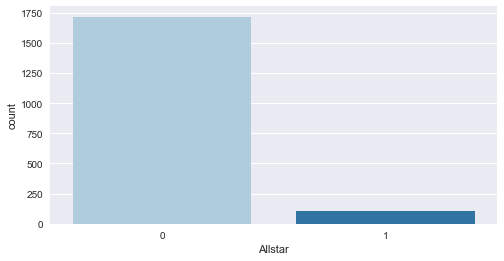

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(x='Allstar', data=data_big, palette='Paired')
getBinaryClassInfo(data_big, 'Allstar')

Our dataset contains over 1,800 samples and around 6% of those samples represent all-star seasons.

### Correlation Matricies

Let's ensure there are no null values in our dataset, so we can produce a full correleation matrix

In [5]:
data_big.isnull().values.any()

False

Remove non-numeric features from data:

In [6]:
def getNumericDataframe(data):
    non_numeric = []
    for col in data.columns.tolist():
        data_type = data[col].dtype
        if data_type == np.dtype('O'):
            non_numeric.append(col)
    return data.drop(non_numeric, axis=1)

In [7]:
data_big = getNumericDataframe(data_big)
data_small = getNumericDataframe(data_small)

Correlation matrix for **data_big**:

In [8]:
data_big.corr()

,Unnamed: 0,Age,G,GS,MP,3PAr,FTr,AST%,STL%,BLK%,...,FTA,FT%,AST,STL,BLK,TOV,Popularity,C,PPG,Allstar
Unnamed: 0,1.000000,-0.029268,-0.026637,-0.026898,-0.048844,0.086823,0.003784,-0.001132,-0.063878,0.016330,...,-0.028012,0.029906,-0.012423,-0.046087,-0.039808,-0.052524,-0.413031,0.012672,-0.011292,-0.104952
Age,-0.029268,1.000000,0.010117,0.003263,0.013276,0.123270,-0.107627,0.067787,-0.048429,-0.058320,...,-0.048286,0.095012,0.043187,-0.016264,-0.043278,-0.028829,0.041817,0.030165,0.005249,0.002540
G,-0.026637,0.010117,1.000000,0.570280,0.845661,-0.089734,-0.021388,0.071932,0.013151,0.103674,...,0.548737,0.159633,0.499356,0.668221,0.440622,0.646546,-0.033394,0.063321,0.478933,0.119611
GS,-0.026898,0.003263,0.570280,1.000000,0.835597,-0.170978,0.113413,0.227164,0.072170,0.102536,...,0.686872,0.133551,0.594087,0.706508,0.490584,0.727122,-0.028414,0.070587,0.722674,0.317181
MP,-0.048844,0.013276,0.845661,0.835597,1.000000,-0.105248,0.077183,0.251729,0.071235,0.044900,...,0.772664,0.220622,0.697274,0.831501,0.491644,0.845165,-0.028222,0.014954,0.786181,0.292162
3PAr,0.086823,0.123270,-0.089734,-0.170978,-0.105248,1.000000,-0.426347,0.021166,0.032165,-0.484807,...,-0.261125,0.222976,-0.018817,-0.043235,-0.423840,-0.179744,-0.046802,-0.475852,-0.136720,-0.094019
FTr,0.003784,-0.107627,-0.021388,0.113413,0.077183,-0.426347,1.000000,0.038518,0.082414,0.235619,...,0.431110,-0.149503,0.073120,0.100286,0.252991,0.189320,0.026015,0.212389,0.173814,0.168295
AST%,-0.001132,0.067787,0.071932,0.227164,0.251729,0.021166,0.038518,1.000000,0.317698,-0.332158,...,0.335772,0.193989,0.773511,0.401667,-0.147929,0.543750,0.046396,-0.219813,0.389150,0.238712
STL%,-0.063878,-0.048429,0.013151,0.072170,0.071235,0.032165,0.082414,0.317698,1.000000,-0.101553,...,0.099720,-0.062964,0.248670,0.454680,-0.072976,0.166756,0.072415,-0.176896,0.064199,0.111201
BLK%,0.016330,-0.058320,0.103674,0.102536,0.044900,-0.484807,0.235619,-0.332158,-0.101553,1.000000,...,0.113618,-0.287367,-0.185508,-0.042117,0.753841,0.007240,0.001657,0.601340,0.012460,0.072166


In [9]:
data_small.corr()

,Unnamed: 0,GS,FTr,BLK%,VORP,3P%,Popularity,C,Allstar
Unnamed: 0,1.000000,-0.026898,0.003784,0.016330,-0.035546,0.052582,-0.413031,0.012672,-0.104952
GS,-0.026898,1.000000,0.113413,0.102536,0.639257,0.078175,-0.028414,0.070587,0.317181
FTr,0.003784,0.113413,1.000000,0.235619,0.231610,-0.237471,0.026015,0.212389,0.168295
BLK%,0.016330,0.102536,0.235619,1.000000,0.166836,-0.288135,0.001657,0.601340,0.072166
VORP,-0.035546,0.639257,0.231610,0.166836,1.000000,0.105934,0.038137,0.071127,0.482641
3P%,0.052582,0.078175,-0.237471,-0.288135,0.105934,1.000000,-0.052462,-0.329816,0.049336
Popularity,-0.413031,-0.028414,0.026015,0.001657,0.038137,-0.052462,1.000000,-0.023880,0.082775
C,0.012672,0.070587,0.212389,0.601340,0.071127,-0.329816,-0.023880,1.000000,0.021269
Allstar,-0.104952,0.317181,0.168295,0.072166,0.482641,0.049336,0.082775,0.021269,1.000000


Features such as **VORP**, **PPG**, and **TOV** are highley correlated with all-allstar selection.

## Cluster Analysis

We'll perform a cluster anlysis to see how well-seperated our 2 classes are. To start, we'll use PCA to reduce our feature sets to 2 and 3 dimensions. From there we will see how well they are structured and how seperated our two classes are among them.
* All-Stars = Grey
* Non-All-Stars = Red

If you're running this as a notebook on your machine, you can pan around the 3-dimensional plots.

In [10]:
def pcaCluster(X, dimension):
    
    acceptable_dims = [2, 3]
    if dimension not in acceptable_dims:
        print('Only capable of 2D or 3D')
    
    pca = PCA(n_components=dimension)
    pca.fit(X.transpose())
    reduced = pd.DataFrame(pca.components_.transpose())

    if dimension == 2:
        reduced.columns = ['x', 'y']
        reduced['label'] = y
        
        %matplotlib inline
        plt.figure(figsize=(10, 7))
        plt.scatter(reduced.x, reduced.y, c=reduced.label, s=50, cmap='Set1')
        plt.colorbar()
    
    if dimension == 3:
        reduced.columns = ['x', 'y', 'z']
        reduced['label'] = y

        %matplotlib notebook
        fig = plt.figure()
        plt.rcParams['figure.figsize']=(7,7)
        ax = fig.add_subplot(111, projection='3d')
        p = ax.scatter(reduced['x'], reduced['y'], reduced['z'], c=reduced['label'], cmap='Set1')
        fig.colorbar(p)

#### 2D PCA Clustering for data_big

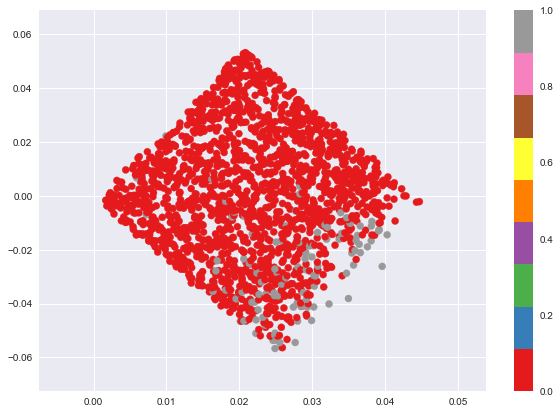

In [11]:
pcaCluster(data_big, 2)

#### 3D PCA Clustering for data_big

<IPython.core.display.Javascript object>


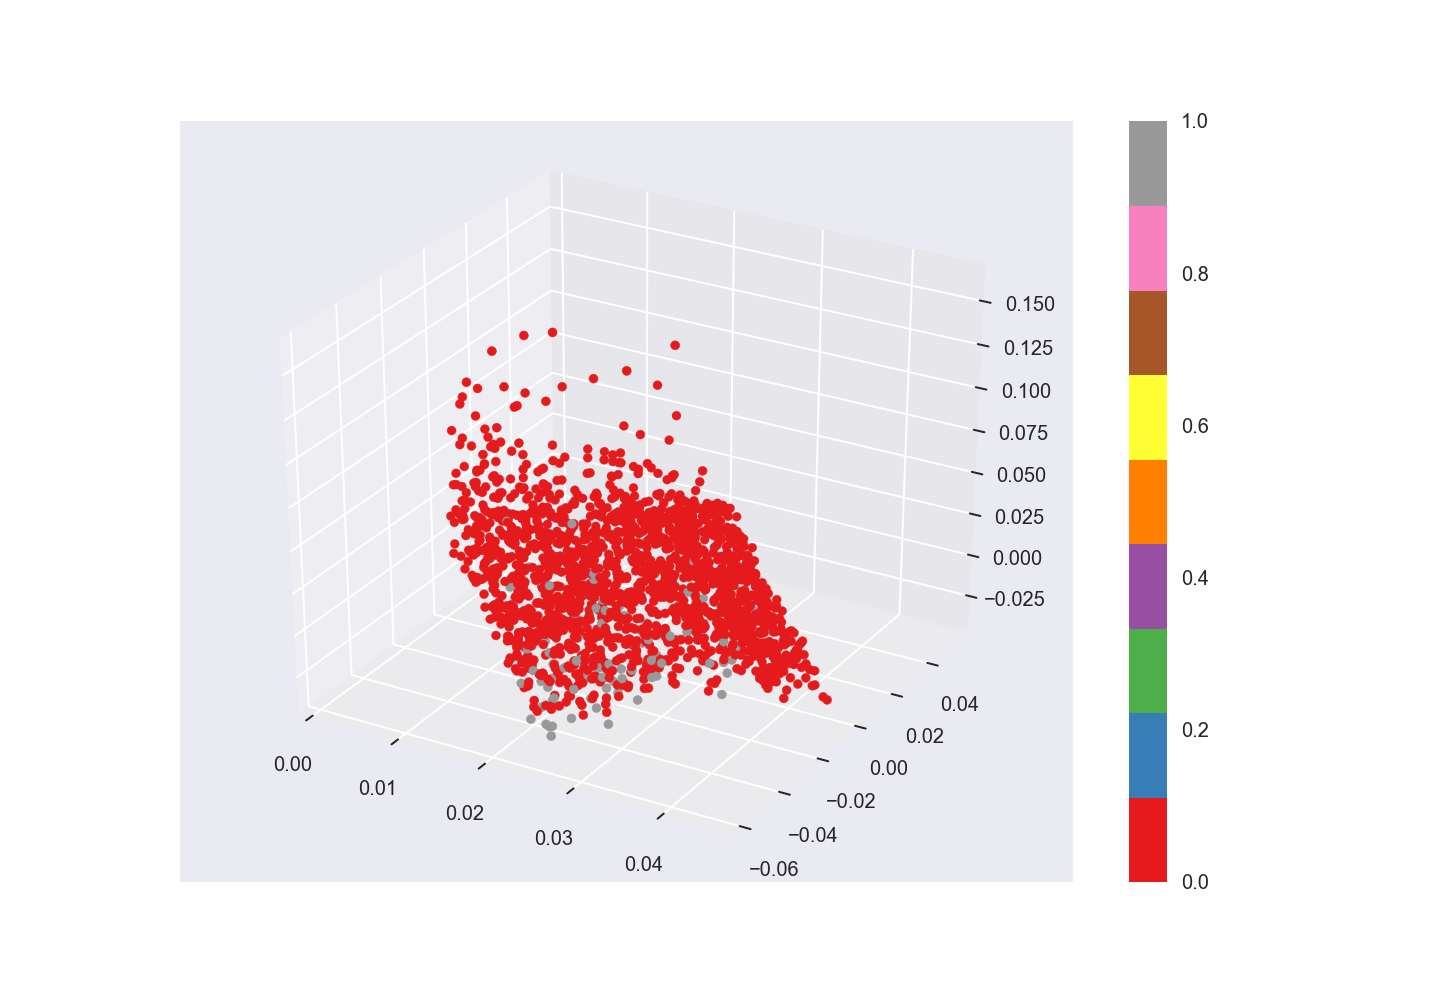

In [30]:
%matplotlib notebook
plt.rcParams['figure.figsize']=(10,7)
pcaCluster(data_big, 3)

Our more expansive dataset appears extrememly structured in 2D. All players create a near-perfect square while all-stars tend to reside on one of it's sides. In 3D our data has more dispersion. Many players reside on a thin plane while many othes sprawl out above that plane. All-stars are above and to one specific side of the plane.

#### 2D PCA Clustering for data_small

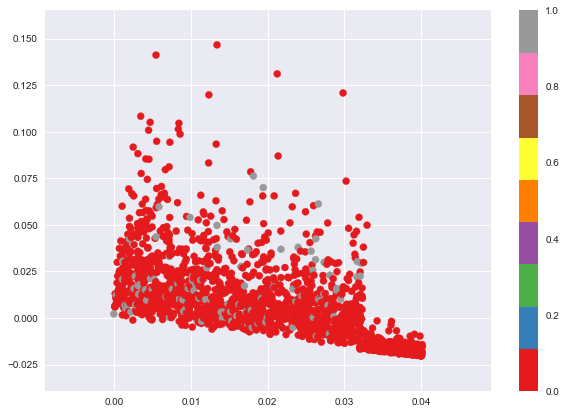

In [32]:
%matplotlib inline
plt.figure(figsize=(10, 10))
pcaCluster(data_small, 2)

#### 3D PCA Clustering for data_small

<IPython.core.display.Javascript object>


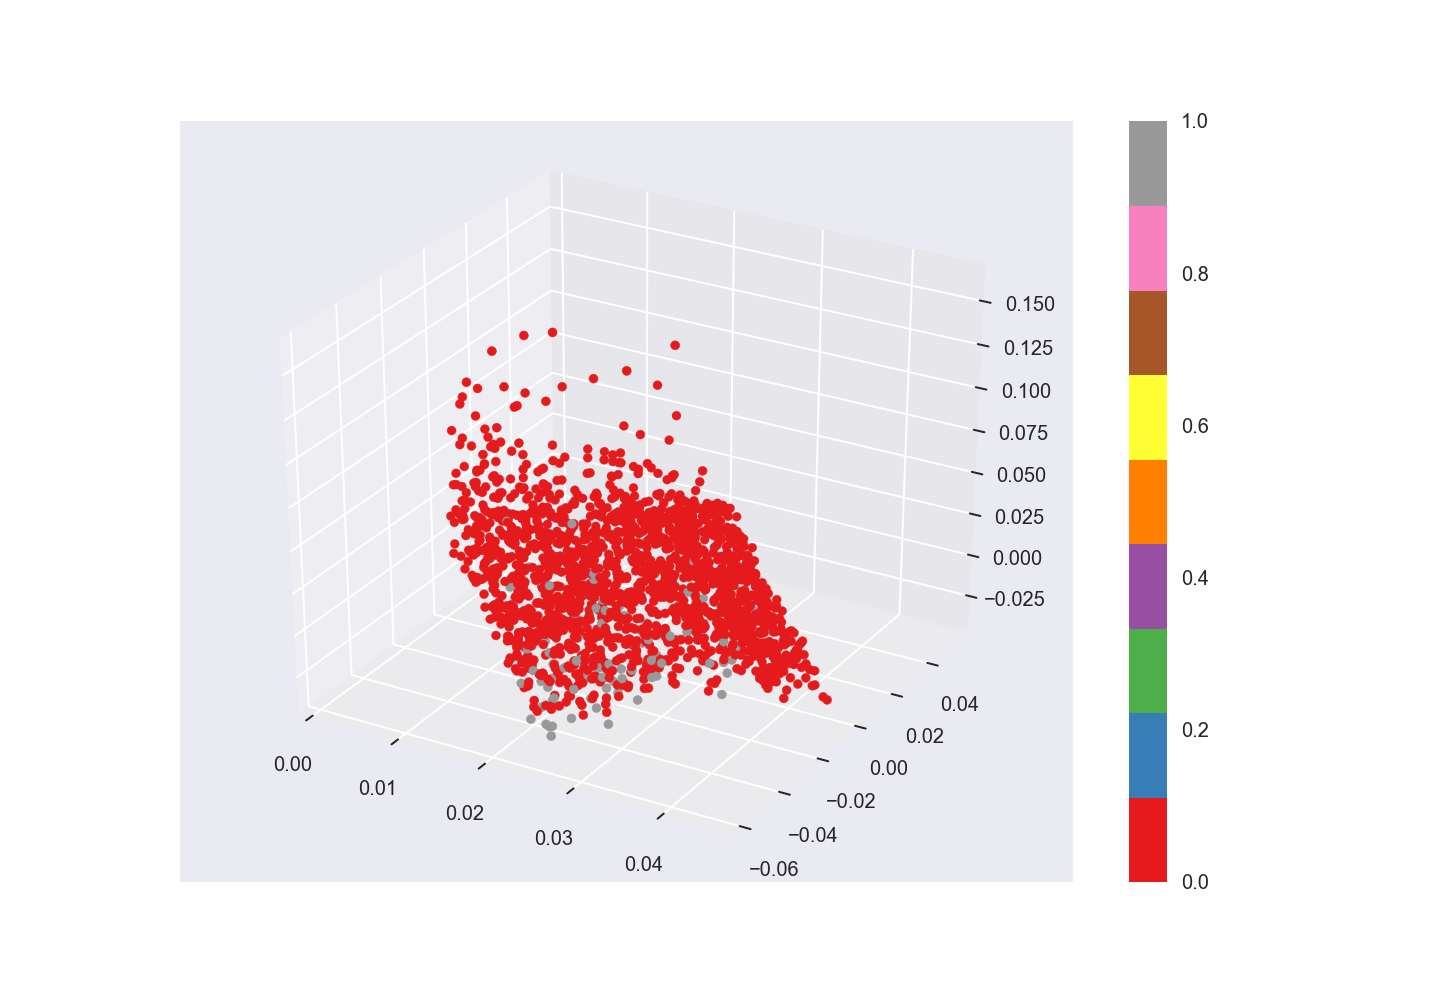

In [34]:
%matplotlib notebook
plt.rcParams['figure.figsize']=(10,7)
pcaCluster(data_big, 3)

Our less expansive dataset seems to have similar characteristics when decomposed and plotted. There is definitley less structure, most likely due to there being less colinearity between features. However, our two classes seem to be less seperated with this smaller dataset.

### PCA Analysis

Because of these results, using dimensionality reduction for condensing our feature set might be tricky. Let's see what the loss of explained variance is for each dimension we drop:

In [15]:
def plotExplainedVariance(X):
    
    %matplotlib inline
    plt.figure(figsize=(10, 5))

    pca = PCA().fit(X)

    explained_var = list(np.cumsum(pca.explained_variance_ratio_))
    dimensions = list(range(1, X.shape[1]+1))
    
    dimensions = np.array(list(range(1, X.shape[1]+1)))
    plt.plot(dimensions, explained_var)
    plt.xlabel('n_dimensions')
    plt.ylabel('cumulative explained variance')

Explained variance for **data_big**:

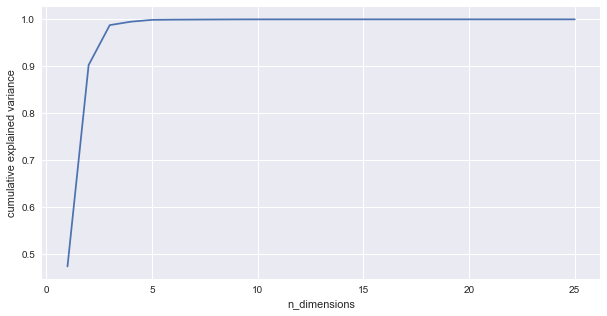

In [16]:
plotExplainedVariance(X_big)

Explained variance for **data_small**:

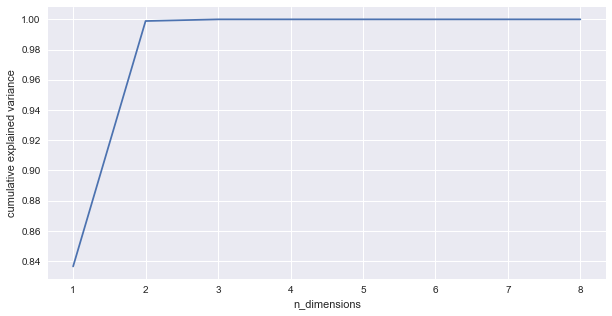

In [17]:
plotExplainedVariance(X_small)

The explained variance plots for both our datasets are very steep. We can decompose **data_big** from 24 to 4 dimensions and **data_small** from 7 to 2 dimensions and still retain the vast majority of explained variance.

However, PCA makes the assumption that our features have linear relationships with eachother. This is most likely not the case, our features are most likey related to each other in much more complecated ways.

With this, we should try using a manifold method dimensionality reduction. This will allow us to ditch the naive linear assumption, but will also deprive of explained variance knowledge. Let's decompose our feature sets using isometric mapping and then analyze them:

### Isometric Mapping Analysis

In [24]:
def isometricMap(X, dimension):    
    
    acceptable_dims = [2, 3]
    if dimension not in acceptable_dims:
        print('Only capable of 2D or 3D')
    
    isomap = Isomap(n_components=dimension)
    isomap = pd.DataFrame(isomap.fit_transform(X))

    if dimension == 2:
        isomap.columns = ['x', 'y']
        isomap['label'] = y
        
        %matplotlib inline
        plt.figure(figsize=(10, 10))
        plt.scatter(isomap.x, isomap.y, c=isomap.label, s=50, cmap='Set1')
        plt.colorbar()
        
    if dimension == 3:
        isomap.columns = ['x', 'y', 'z']
        isomap['label'] = y
        
        %matplotlib notebook
        fig = plt.figure()
        plt.rcParams['figure.figsize']=(7,7)
        ax = fig.add_subplot(111, projection='3d')
        p = ax.scatter(isomap['x'], isomap['y'], isomap['z'], c=isomap['label'], cmap='Set1')
        fig.colorbar(p)

#### 2D IsoMap Clustering for **data_big**:

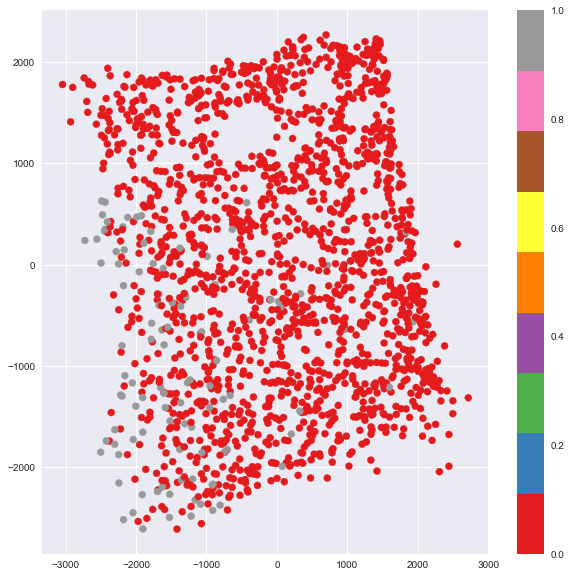

In [35]:
%matplotlib inline
plt.figure(figsize=(7, 7))
isometricMap(data_big, 2)

#### 3D IsoMap Clustering for **data_big**:

<IPython.core.display.Javascript object>


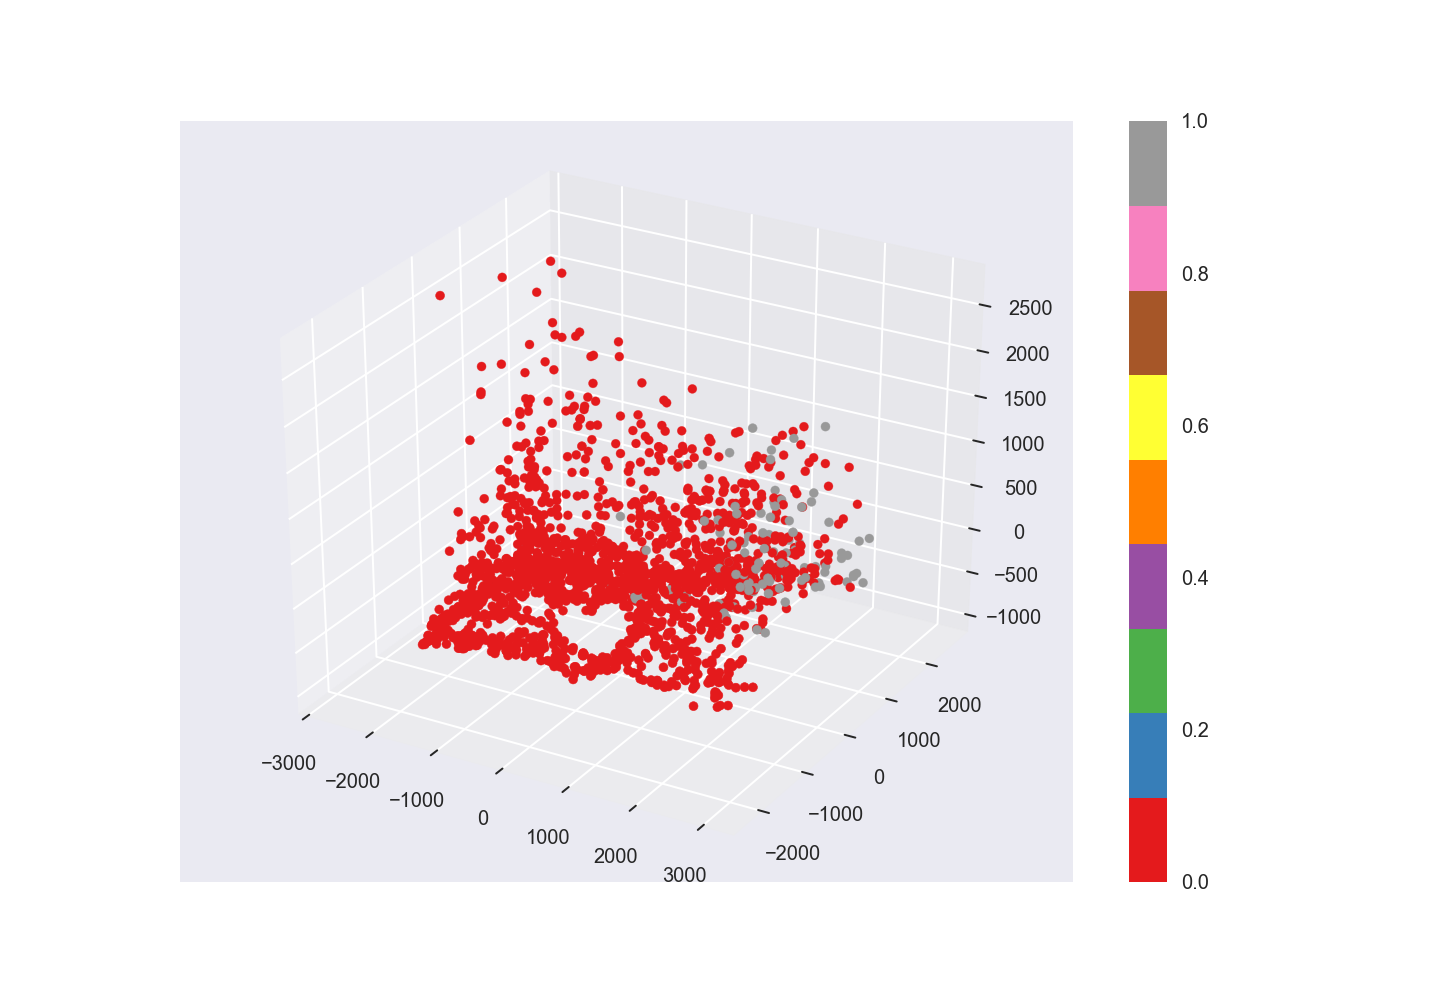

In [38]:
%matplotlib notebook
plt.rcParams['figure.figsize']=(10,7)
isometricMap(data_big, 3)

#### 2D IsoMap Clustering for **data_small**

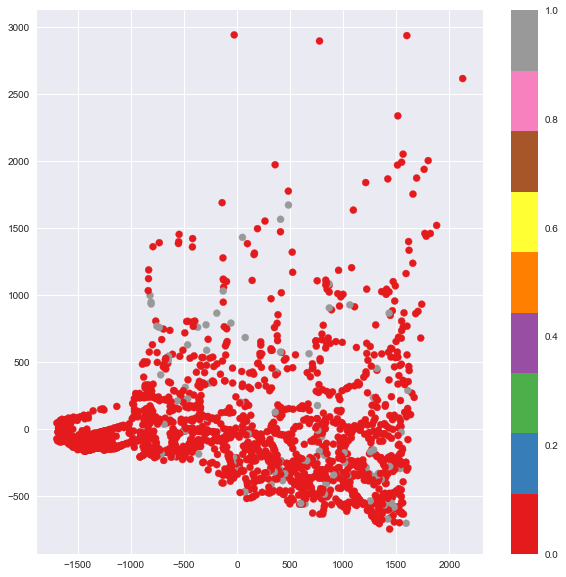

In [39]:
%matplotlib inline
plt.figure(figsize=(7, 7))
isometricMap(data_small, 2)

#### 3D IsoMap Clustering for **data_small**

<IPython.core.display.Javascript object>


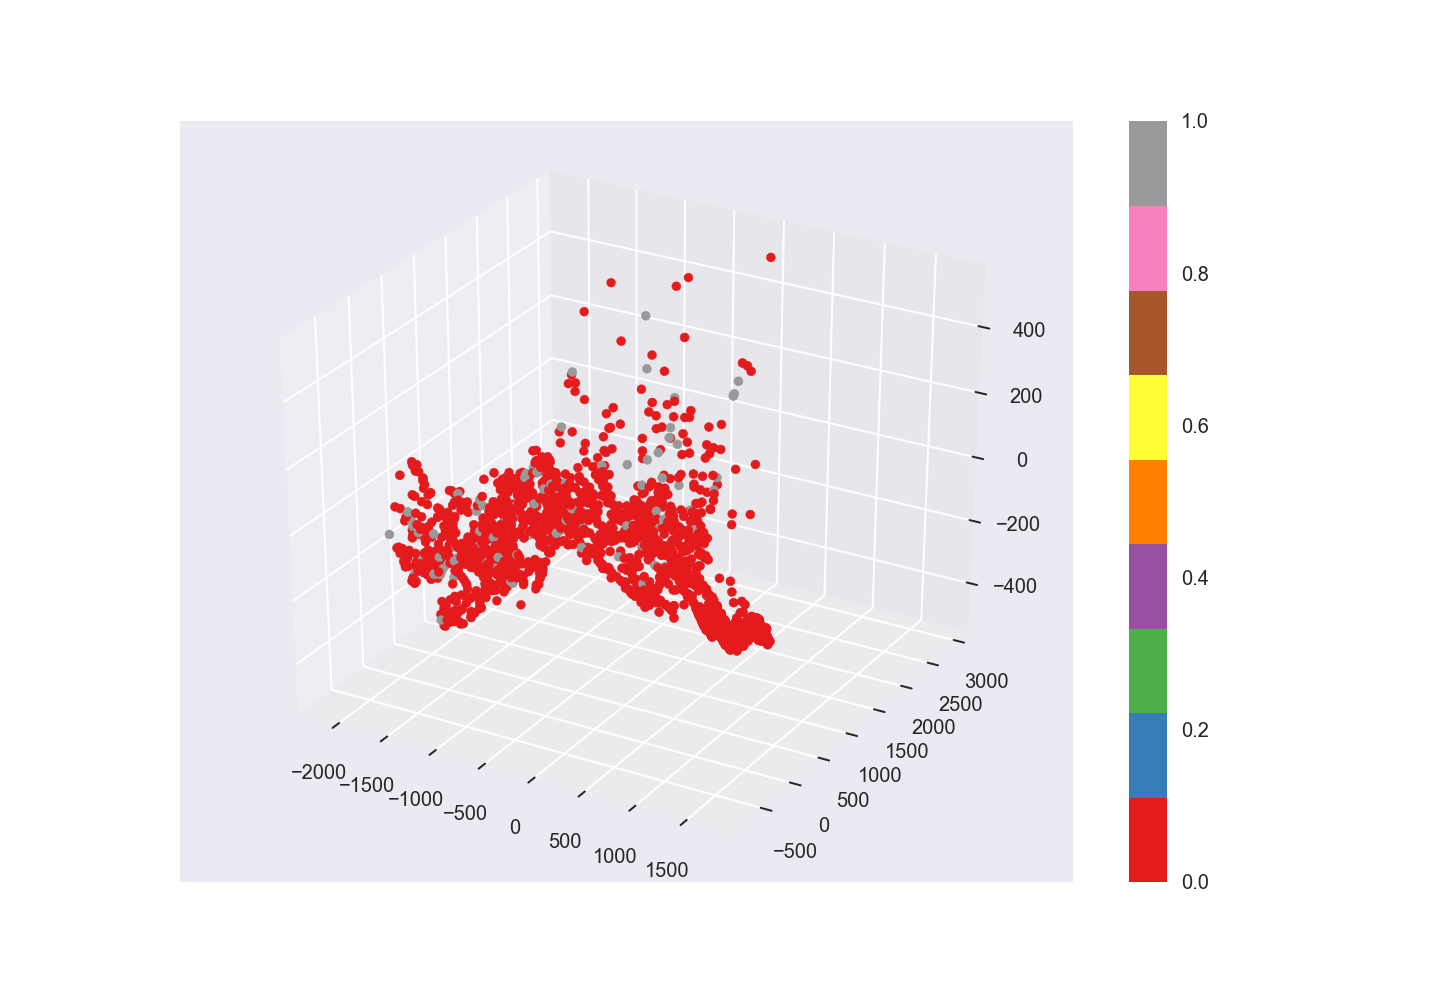

In [40]:
%matplotlib notebook
plt.rcParams['figure.figsize']=(10,7)
isometricMap(data_small, 3)

Seperation definitley seems better with isometric mapping. When we cluster with it, our data takes on a much less linear shape. Since we have seemingly better class seperation without PCA's linear assumption, it looks like our features share non-linear relationships.

Clustering alone hasn't made **data_big** or **data_small** appear to be much more superior than the other. As a result of this, we will chose which dataset to use when we start modeling.